<div style="width: 80%;">

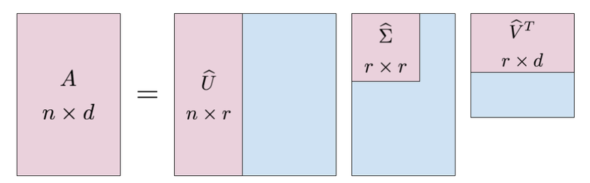
<div style="clear: both"></div>
<br>

<div style="font-size: 20pt; float: left;">Anwendungen der linearen Algebra</div>
<div style="font-size: 20pt; text-align: right;">FS 2024</div>
<div style="font-size: 15pt; margin-top: 10px;">Fachexperten: Roger Burkhardt, Cédric Huwyler</div>
</div>
<br>


# Mini-Challenge 4 zum Thema *Singulärwertzerlegung*

In dieser Mini-Challenge lernst du die Singulärwertzerlegung am Beispiel der Bildkompression besser kennen. Für die Bildkompression gibt es zwar wesentlich performantere Algorithmen (z.B. JPEG), aber an diesem Beispiel können wir gut untersuchen, was die Rolle der einzelnen Singulärwerte ist. Die SVD ist ein mächtiges Tool der linearen Algebra und besitzt viele weitere interessante Anwendungen (siehe Skript).

Bibliotheken einbinden:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

## Aufgabe 1: Dimensionsreduktion am Beispiel der Bildkompression

### a) Bild einlesen

Lies eines der beiden beigelegten Bilder oder ein eigenes Bild in eine Matrix $A$ ein und stelle es graphisch dar. Die Bilddimensionen spielen dabei keine Rolle.

**Hinweise:**
* Das verwendete Bild muss zwingend schwarz-weiss sein, da sonst für jeden Farbkanal eine Matrix vorliegt (Tensor). Falls du ein eigenes Bild einlesen möchtest, musst du es manuell in einem Grafikprogramm auf den Modus schwarz-weiss setzen und als JPEG speichern (PNG scheint damit nicht so gut klarzukommen).
* Benutze eine geeignete Funktion zum Einlesen. Matplotlib hat zum Beispiel die `imread()`-Funktion.
* Benutze die `imshow()`-Funktion aus Matplotlib zum Darstellen des Bildes und wähle die Colormap "gray".

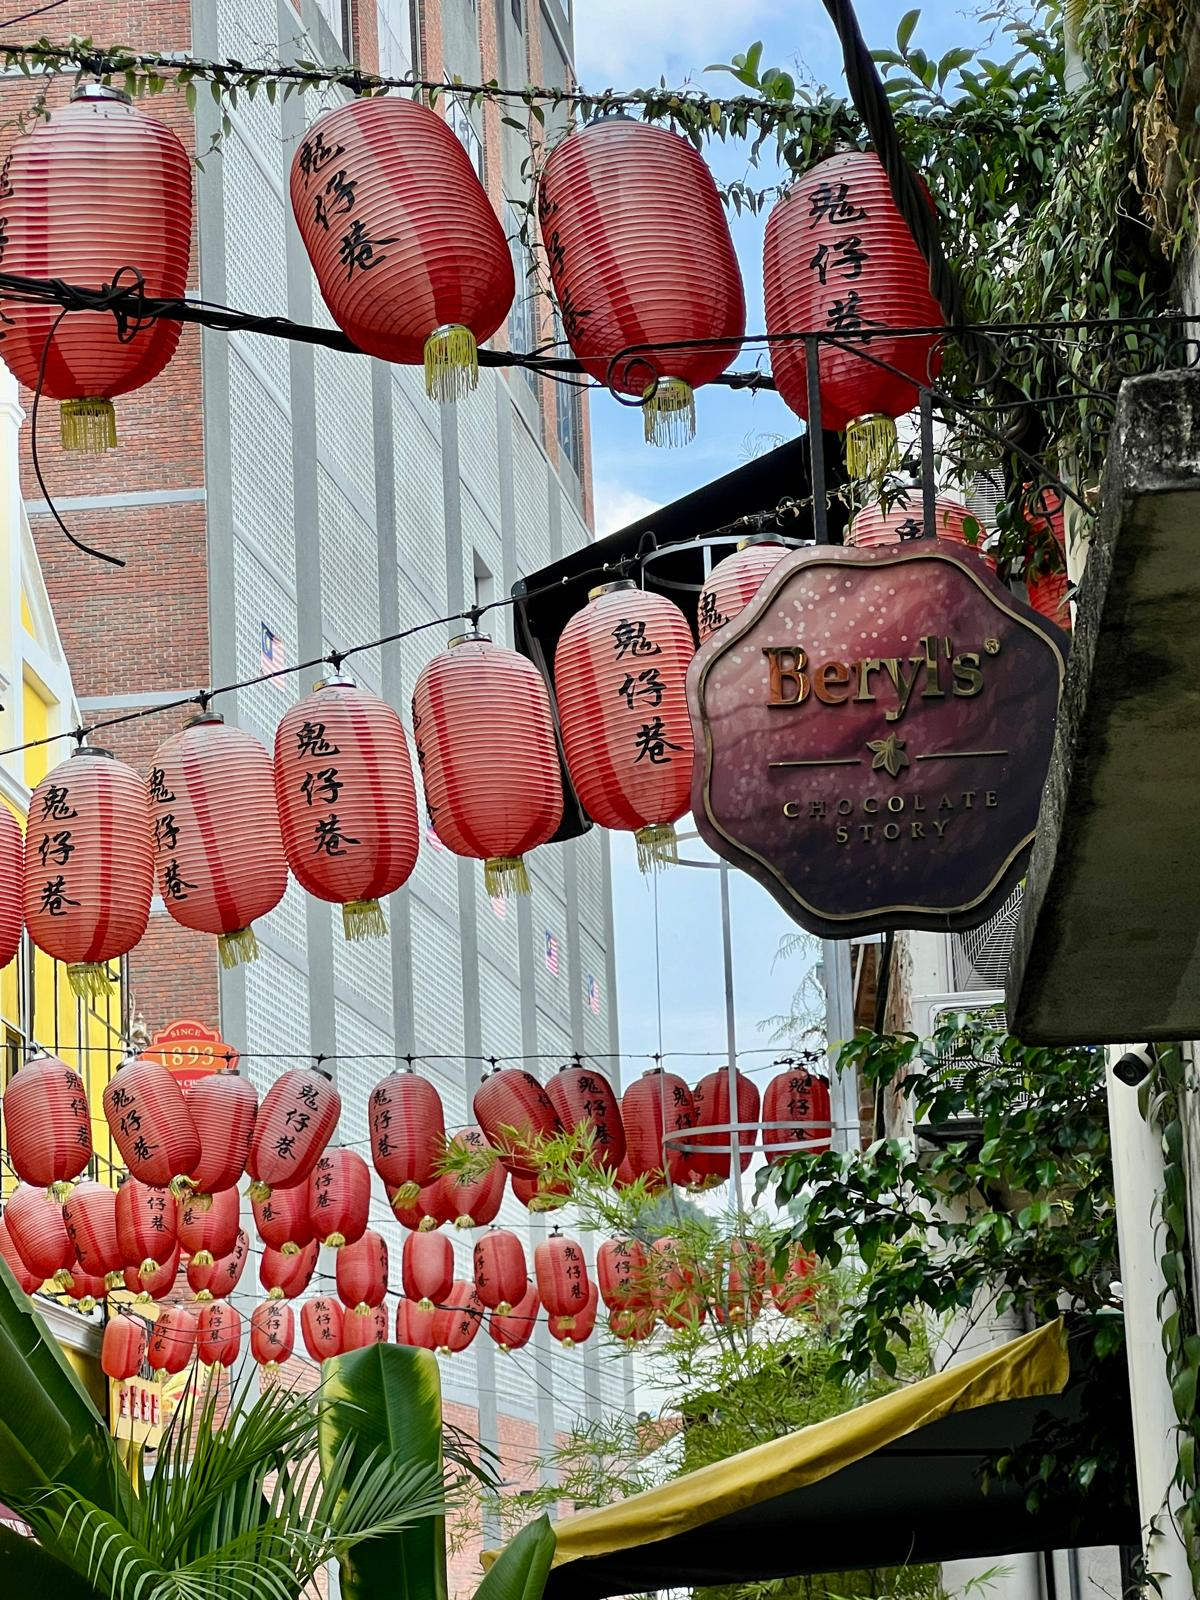

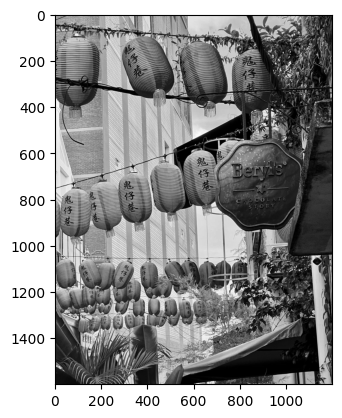

In [2]:
# DEIN CODE
img = Image.open("C:/Users/Sandra/Documents/FHNW/24_HS/ala/mini_challenge/le4_svd/3.jpeg")
img_gray = ImageOps.grayscale(img)


plt.imshow(img_gray, cmap="gray")
img

### b) Singulärwertzerlegung berechnen

Berechne nun die Singulärwertzerlegung der Matrix $A$ mit `np.linalg.svd()`. Was sind die Dimensionen der Matrizen $U$, $\Sigma$ und $V$? Rekonstruiere die Originalmatrix $A$ aus $U$, $\Sigma$ und $V$ und stelle sicher, dass du die Matrix aus dem Resultat von `np.linalg.svd()` korrekt rekonstruieren kannst.

**Hinweis:** Da `np.linalg.svd()` nur die Singulärwerte liefert und nicht $\Sigma$, musst du die Matrix $\Sigma$ selbst erstellen. Wähle dort insbesondere die richtigen Dimensionen.

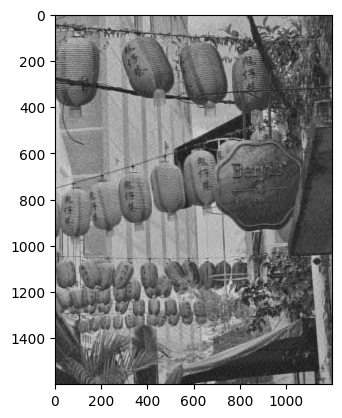

In [3]:
# DEIN CODE
data = np.asarray(img_gray)

U, S, V = np.linalg.svd(data) #S=list mit Singulärwerten Desc, V= V.T
U.shape, S.shape, V.shape


data_5 = np.matrix(U[:,:5]) @ np.diag(S[:5]) @ np.matrix(V[:5,:])
data_50 = np.matrix(U[:,:50]) @ np.diag(S[:50]) @ np.matrix(V[:50,:])
data_100 = np.matrix(U[:,:100]) @ np.diag(S[:100]) @ np.matrix(V[:100,:])


plt.imshow(data_5, cmap="grey")
plt.imshow(data_50, cmap="grey")
plt.imshow(data_100, cmap="grey")

### d) Truncated SVD

Laut Definition der Singulärwertzerlegung sind die Singulärwerte in $\Sigma$ absteigend nach ihrer Grösse sortiert. Im Skript wird besprochen, dass die ersten paar Singulärwerte meistens schon einen grossen Teil der Varianz in den Daten (bzw. hier im Bild) erklären, d.h. dass die ersten paar Singulärwerte meistens sehr viel grösser sind als der Rest und ihre Grösse sehr schnell abfällt.

So kann es für eine Komprimierungsanwendung Sinn machen, nur die ersten $k$ Singulärwerte zu berücksichtigen und den Rest der Singulärwerte in $\Sigma$ auf Null zu setzen (**Low Rank Approximation** oder **Truncated SVD**). Damit sind nur noch die ersten $k$ Spalten von $U$ und $V$ relevant für die Rekonstruktion der ursprünglichen Matrix, den Speicherplatz für den Rest können wir uns sparen:

$$
A \approx A_k = U\text{[:,k]} \; \Sigma\text{[:k,:k]} \; V^T\text{[:k,:]}.
$$

Im Vergleich zur ursprünglichen Matrix $A \in \mathbb{R}^{m\times n}$, die $m\cdot n$ Elemente enthält, brauchen wir nun nur noch $m\cdot k + k + n\cdot k = k (1 + m + n)$ Elemente zur Repräsentation von $A$. Für $k=20$ entspricht das einer Reduktion auf 10% des ursprünglichen Speicherplatzes. Natürlich mit entsprechenden Informationsverlusten.

Führe nun folgende Schritte durch:

1. Visualiere den Abfall der Singulärwerte mit einem Scree-Plot und mache eine grobe Abschätzung, ab welchem $k$ du einigermassen vernünftige Rekonstruktionen des Bildes erwarten kannst.

2. Schreibe eine Funktion `truncated_SVD( A, k )`, die die Rang-$k$-Approximation $A_k$ von $A$ berechnet.

3. Visualisiere $A_k$ für verschiedene Wahlen von $k$ zwischen 1 und 20. Ab welchem $k$ sind die groben Details einigermassen gut zu erkennen? Welchem Kompressionfaktor entspricht das?

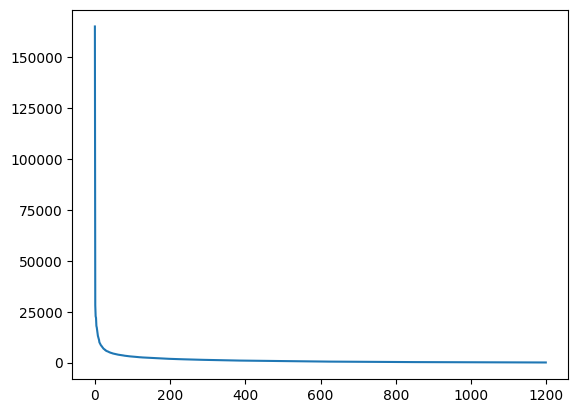

In [4]:
# DEIN CODE
plt.plot(S)


In [5]:
def truncated_svd(A, k):
    U, S, V = np.linalg.svd(A)

    data = np.matrix(U[:,:k]) @ np.diag(S[:k]) @ np.matrix(V[:k,:])

    plt.imshow(data, cmap="grey")


    return U, S, V, data


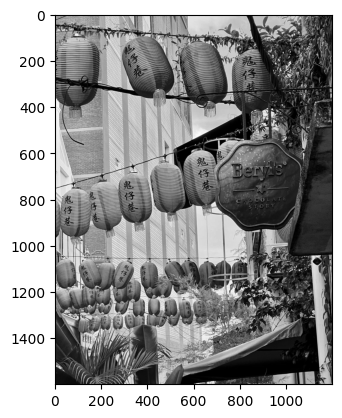

In [6]:
test = truncated_svd(img_gray, 1200)


### e) Rekonstruktionsfehler als Funktion von $k$

Es ist anzunehmen, dass für zunehmende $k$ der Unterschied zwischen Original $A$ und Rekonstruktion $A_k$ immer kleiner wird. Die Wahl einer geeigneten Distanzmetrik auf durch Matrizen repräsentierten Bildern ist unklar, berechne darum beispielhaft die über die Frobenius-, die Summen- und die Maximumnorm induzierten Distanzmasse $d(A, A_k) = ||A-A_k||$ und stelle diese graphisch als Funktion von $k$ dar.

In [7]:
# DEIN CODE
def calculate_matrix_norms(A):
    fro     = np.linalg.norm(A, 'fro')
    spekt   = np.linalg.norm(A, ord=2)
    maxi    = np.linalg.norm(A, ord=np.inf)
    colm    = np.linalg.norm(A, ord=1)
    rown    = np.linalg.norm(A, ord=np.inf)
    sumn    = np.sum(np.abs(A))

    norms = {
        "Frobenius-Norm": fro,
        "Spektral-Norm": spekt,
        "Maximum-Norm": maxi,
        "Spalten-Norm": colm,
        "Zeilen-Norm": rown,
        "Summen-Norm": sumn
    }
       
    print("Matrix:")
    print(A)
    print("\nBerechnete Matrixnormen:")
    for name, value in norms.items():
        print(f"{name}: {value}")

    return fro, spekt, maxi, colm, rown, sumn



fro, spekt, maxi, colm, rown, sumn  = calculate_matrix_norms(data)

Matrix:
[[175 176 159 ...  23  34  20]
 [173 167 155 ...  22  34  27]
 [136 131 136 ...  20  32  33]
 ...
 [ 14  15  16 ...  56  58  51]
 [ 14  15  16 ...  36  53  53]
 [ 13  14  16 ...  29  55  59]]

Berechnete Matrixnormen:
Frobenius-Norm: 184317.0799003717
Spektral-Norm: 165223.49669181218
Maximum-Norm: 200320.0
Spalten-Norm: 265031.0
Zeilen-Norm: 200320.0
Summen-Norm: 215085975


### f) Structural Similarity als Ähnlichkeitsmass

Wie oben bereits angetönt, sind die benutzten Distanzmasse nicht ideal für den Vergleich von Bildern, da sie relativ schlecht die menschliche Wahrnehmung von Ähnlichkeiten zwischen Bildern berücksichtigen. Hierzu gibt es den **[Structural Similarity Index (SSIM)](https://en.wikipedia.org/wiki/Structural_similarity_index_measure)**, der sich auf Unterschiede in der Helligkeit (luminance), im Kontrast und in der Struktur fokussiert. Der SSIM ist 1, wenn die beiden Bilder genau gleich sind und sonst kleiner als 1 (also ein Ähnlichkeitsmass wie in Kapitel 8 des Skripts kennengelernt). Auch er ist nicht perfekt, aber eine bessere Annhäherung an die menschliche Wahrnehmung. Berechne im Folgenden wie oben den SSIM als Funktion von $k$ und stelle dein Resultat graphisch dar. Für welches $k$ kommst du auf eine Ähnlichkeit über 95%?

Du kannst hierzu die Implementierung aus `scikit-image` benutzen (das du je nachdem noch installieren musst):

In [10]:
from skimage.metrics import structural_similarity as ssim

ModuleNotFoundError: No module named 'skimage'

In [ ]:
# DEIN CODE
